# Capstone project: Titanic Survival Prediction

In [1]:
# Capstone project: Titanic Survival Prediction

In [2]:
!pip install scikit-plot scipy==1.11.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 44.3 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1


In [ ]:
import os
os.kill(os.getpid(), 9)

In [1]:
!ls /content/

sample_data  Titanic-Dataset.csv


# Data Dictionary

| Variable   | Definition                       | Key                                           |
|------------|-----------------------------------|-----------------------------------------------|
| survival   | Survival                         | 0 = No, 1 = Yes                               |
| pclass     | Ticket class                     | 1 = 1st, 2 = 2nd, 3 = 3rd                     |
| gender        | Gender                              |                                               |
| Age        | Age in years                     |                                               |
| sibsp      | # of siblings/spouses aboard     |                                               |
| parch      | # of parents/children aboard     |                                               |
| ticket     | Ticket number                    |                                               |
| fare       | Passenger fare                   |                                               |
| cabin      | Cabin number                     |                                               |
| embarked   | Port of Embarkation              | C = Cherbourg, Q = Queenstown, S = Southampton |

---

## Variable Notes

- **pclass**: A proxy for socio-economic status (SES)  
  - 1st = Upper  
  - 2nd = Middle  
  - 3rd = Lower  

- **age**:  
  - Age is fractional if less than 1.  
  - If the age is estimated, it is in the form of `xx.5`.

- **sibsp**: The dataset defines family relations as follows:  
  - Sibling = brother, sister, stepbrother, stepsister  
  - Spouse = husband, wife (mistresses and fiancés were ignored)  

- **parch**: The dataset defines family relations as follows:  
  - Parent = mother, father  
  - Child = daughter, son, stepdaughter, stepson  
  - Some children travelled only with a nanny; therefore, `parch=0` for them.


# Data Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set the style
plt.style.use('fivethirtyeight')

df = pd.read_csv('/content/Titanic-Dataset.csv') # Read the dataset.
df.head()

,PassengerId,Survived,Pclass,Name,gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
df.shape

(891, 12)

In [3]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'gender', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   gender       891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df['Survived'].value_counts()

,count
Survived,
0,549
1,342


In [7]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
gender,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [8]:
df.isna().mean() * 100

,0
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
gender,0.000000
Age,19.865320
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.000000


In [9]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df = df.drop(columns=['Cabin'])
df.isna().mean() * 100

,0
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
gender,0.000000
Age,0.000000
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.000000


In [10]:
df['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,77


In [11]:
df['Embarked'] = df['Embarked'].fillna('S')
df.isna().mean() * 100

,0
PassengerId,0.0
Survived,0.0
Pclass,0.0
Name,0.0
gender,0.0
Age,0.0
SibSp,0.0
Parch,0.0
Ticket,0.0
Fare,0.0


In [12]:
df.head()

,PassengerId,Survived,Pclass,Name,gender,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [13]:
df = df.drop(columns=['Name','PassengerId'])
df.head()

,Survived,Pclass,gender,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S


In [14]:
# Categorical variables
categorical_variables = ['Survived', 'Pclass', 'gender', 'Embarked', 'Name', 'Ticket']

# Numerical variables
numerical_variables = ['Age', 'SibSp', 'Parch', 'Fare']

In [15]:
df['Survived'].value_counts()

,count
Survived,
0,549
1,342


# categorical variable exploration (univariate)

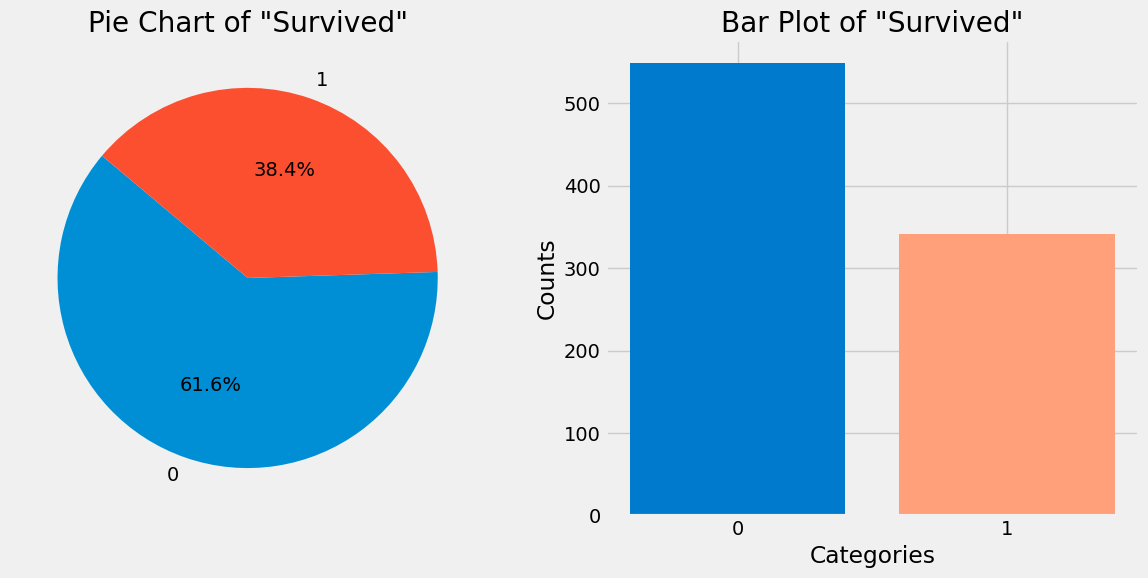

In [16]:
# Define label column and get value counts
label_col_name = 'Survived'
value_counts = df[label_col_name].value_counts()

# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the pie chart
axes[0].pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
axes[0].set_title(f'Pie Chart of \"{label_col_name}\"')

# Plot the bar plot
axes[1].bar([str(i) for i in value_counts.index], value_counts.values, color=['#007acc', '#ffa07a'])
axes[1].set_title(f'Bar Plot of \"{label_col_name}\"')
axes[1].set_xlabel('Categories')
axes[1].set_ylabel('Counts')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

In [17]:
import plotly.express as px
import plotly.graph_objects as go

# Define label column and get value counts
label_col_name = 'Survived'
value_counts = df[label_col_name].value_counts()

# Create Pie Chart
fig_pie = px.pie(names=value_counts.index, values=value_counts.values,
                 title=f'Pie Chart of "{label_col_name}"',
                 labels={str(i): f'Category {i}' for i in value_counts.index})

# Display the plots
fig_pie.show()

# categorical variable exploration (multivariate)

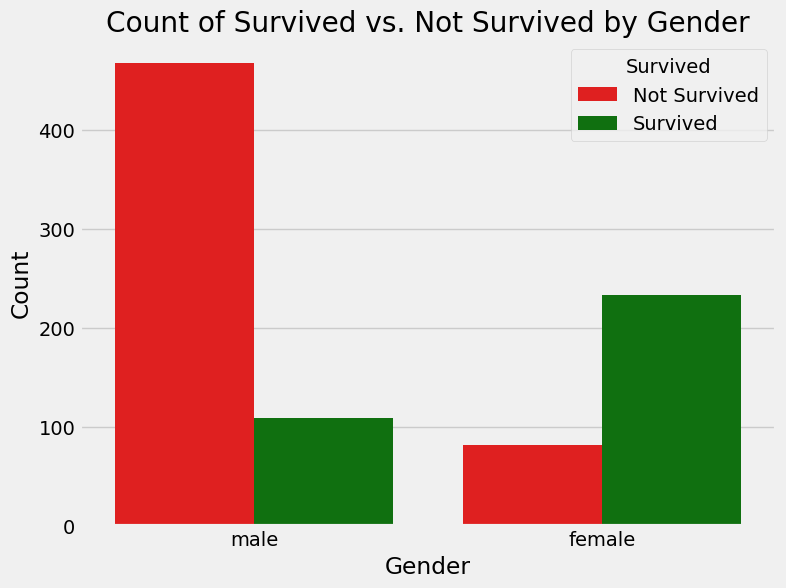

In [18]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='gender', hue='Survived', palette={1: 'green', 0: 'red'})
plt.title('Count of Survived vs. Not Survived by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['Not Survived', 'Survived'])
plt.show()

# numerical variable exploration (univariate)

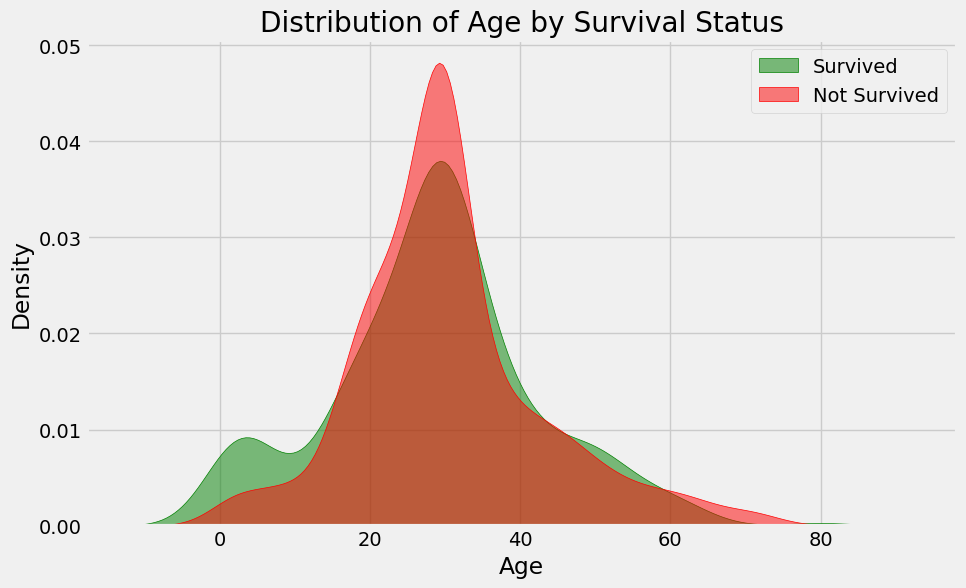

In [19]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df[df['Survived'] == 1], x='Age', label='Survived', shade=True, color='green', alpha=0.5)
sns.kdeplot(data=df[df['Survived'] == 0], x='Age', label='Not Survived', shade=True, color='red', alpha=0.5)
plt.title('Distribution of Age by Survival Status')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()

# numerical variable exploration (multivariate)

In [20]:
numerical_variables+['Survived']

['Age', 'SibSp', 'Parch', 'Fare', 'Survived']

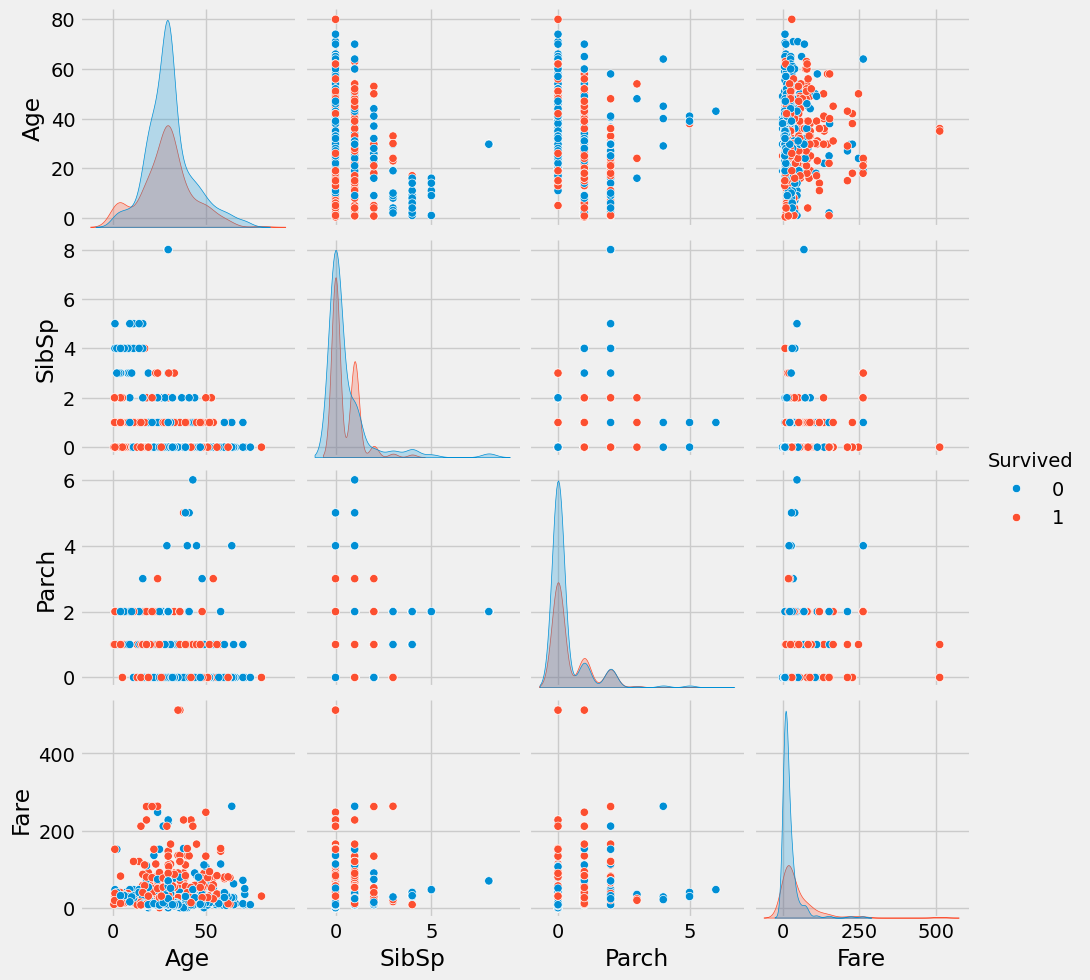

In [21]:
sns.pairplot(df[numerical_variables+['Survived']],hue='Survived')
plt.show()

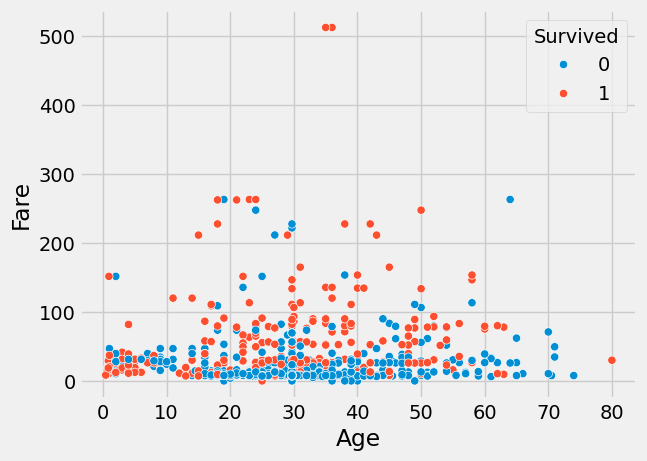

In [22]:
sns.scatterplot(x=df["Age"], y=df["Fare"],hue=df['Survived'])
plt.show()

# Both categorical and numerical

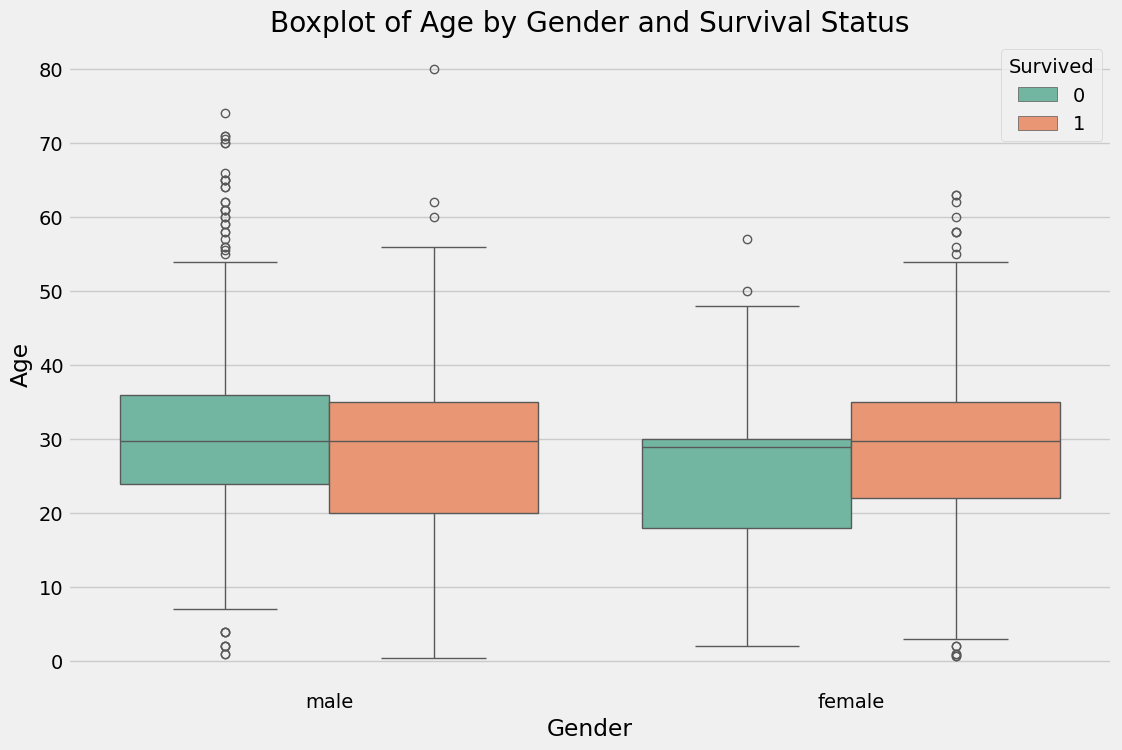

In [23]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='gender', y='Age', hue='Survived', palette='Set2')
plt.title('Boxplot of Age by Gender and Survival Status')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.legend(title='Survived', loc='upper right')
plt.show()

# correlation check

In [24]:
df[numerical_variables+['Survived']].corr()

,Age,SibSp,Parch,Fare,Survived
Age,1.000000,-0.232625,-0.179191,0.091566,-0.069809
SibSp,-0.232625,1.000000,0.414838,0.159651,-0.035322
Parch,-0.179191,0.414838,1.000000,0.216225,0.081629
Fare,0.091566,0.159651,0.216225,1.000000,0.257307
Survived,-0.069809,-0.035322,0.081629,0.257307,1.000000


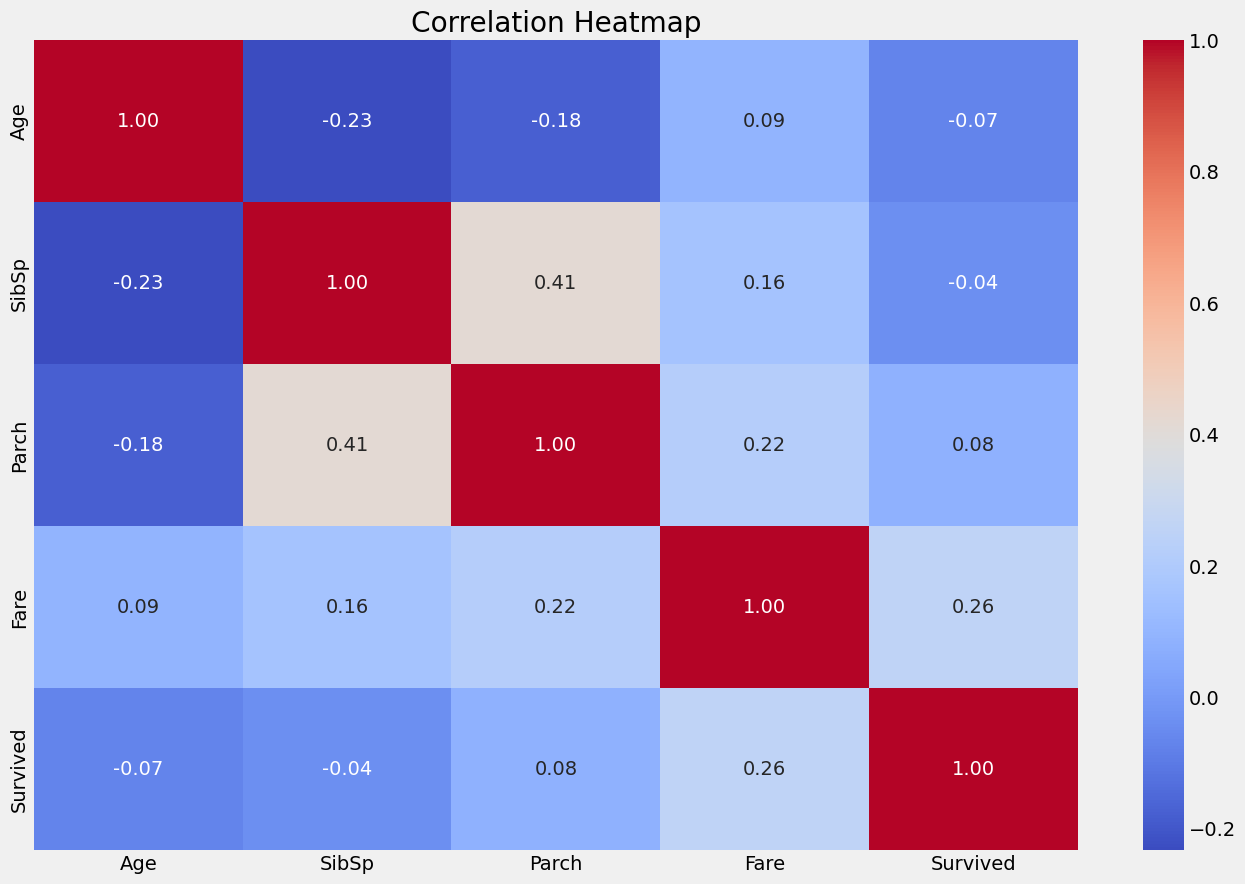

In [25]:
plt.figure(figsize=(15, 10))
sns.heatmap(df[numerical_variables+['Survived']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Encoding categorical variables

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   gender    891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [27]:
df.dtypes

,0
Survived,int64
Pclass,int64
gender,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64
Embarked,object


In [28]:
df['gender'].value_counts()

,count
gender,
male,577
female,314


In [29]:
df['gender'] = df['gender'].map({'male':0,'female':1})
df['gender'].value_counts()

,count
gender,
0,577
1,314


In [30]:
df['Embarked'].value_counts()

,count
Embarked,
S,646
C,168
Q,77


In [31]:
df['Embarked'] = df['Embarked'].map({'S':0,'C':1,'Q':2})
df['Embarked'].value_counts()

,count
Embarked,
0,646
1,168
2,77


In [32]:
df['Ticket'].value_counts()

,count
Ticket,
347082,7
CA. 2343,7
1601,7
3101295,6
CA 2144,6
...,...
9234,1
19988,1
2693,1


In [33]:
df['Ticket'].value_counts().shape

(681,)

In [34]:
df.shape

(891, 9)

In [35]:
(df['Ticket'].value_counts().shape[0] / df.shape[0]) * 100

76.43097643097643

In [36]:
df = df.drop(columns=['Ticket'])
df.head()

,Survived,Pclass,gender,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


# Train test split

In [37]:
X = df.drop(columns=['Survived'])
y = df[['Survived']]

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [39]:
X_train.head()

,Pclass,gender,Age,SibSp,Parch,Fare,Embarked
339,1,0,45.000000,0,0,35.5000,0
732,2,0,29.699118,0,0,0.0000,0
561,3,0,40.000000,0,0,7.8958,0
20,2,0,35.000000,0,0,26.0000,0
785,3,0,25.000000,0,0,7.2500,0


In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [41]:
X_train

array([[-1.57689816, -0.72882288,  1.19214143, ..., -0.47534602,
         0.08369349, -0.56746778],
       [-0.37865751, -0.72882288,  0.01871214, ..., -0.47534602,
        -0.68343834, -0.56746778],
       [ 0.81958314, -0.72882288,  0.80868992, ..., -0.47534602,
        -0.51281526, -0.56746778],
       ...,
       [-0.37865751, -0.72882288,  0.1184772 , ...,  0.72481839,
         0.11619828,  1.02322931],
       [ 0.81958314,  1.37207547,  0.42523841, ...,  0.72481839,
        -0.24584906, -0.56746778],
       [ 0.81958314, -0.72882288, -2.18223186, ...,  0.72481839,
         0.17418264, -0.56746778]])

In [42]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 7), (179, 7), (712, 1), (179, 1))

In [43]:
label = y_test['Survived'].unique().tolist()
label

[0, 1]

In [72]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

Train Accuracy: 0.8539325842696629
Test Accuracy: 0.8156424581005587


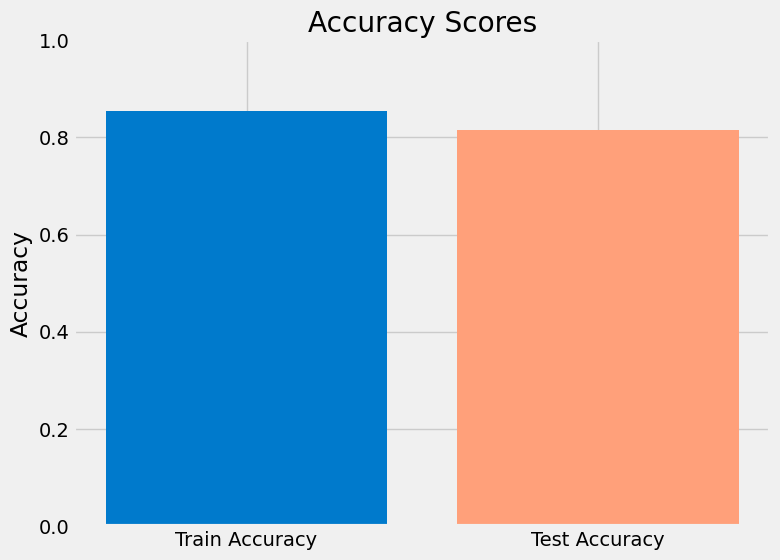

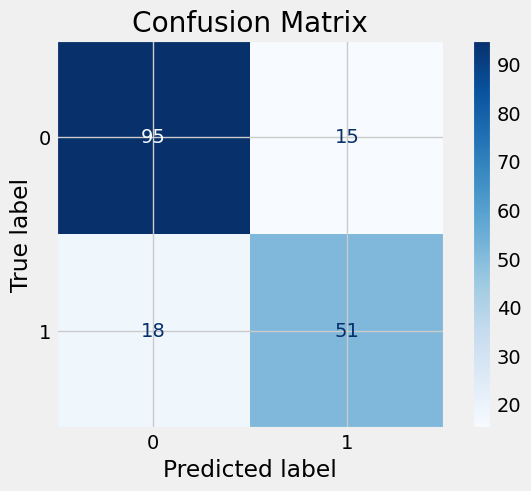

In [73]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

# Make predictions
y_train_pred = classifier.predict(X_train)
y_test_pred = classifier.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print('Train Accuracy:', train_accuracy)
print('Test Accuracy:', test_accuracy)

# Plot accuracy score
plt.figure(figsize=(8, 6))
plt.bar(['Train Accuracy', 'Test Accuracy'], [train_accuracy, test_accuracy], color=['#007acc', '#ffa07a'])
plt.ylim(0, 1)
plt.title('Accuracy Scores')
plt.ylabel('Accuracy')
plt.show()
print('\n\n')
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [68]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define the parameter grid
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9],  # Odd values from 1 to 10 for n_neighbors
    'weights': ['uniform', 'distance']  # Two options for the weights
}

# Initialize the KNeighborsClassifier
knn = KNeighborsClassifier()

# Set up the GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Display the best parameters and the best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Optionally, evaluate on the test set
test_accuracy = best_model.score(X_test, y_test)
print("Test accuracy of the best model: ", test_accuracy)


Best parameters found:  {'n_neighbors': 7, 'weights': 'uniform'}
Best cross-validation score:  0.814586821629075
Test accuracy of the best model:  0.8044692737430168


In [69]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(**grid_search.best_params_)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

Train Accuracy: 0.8384831460674157
Test Accuracy: 0.8044692737430168


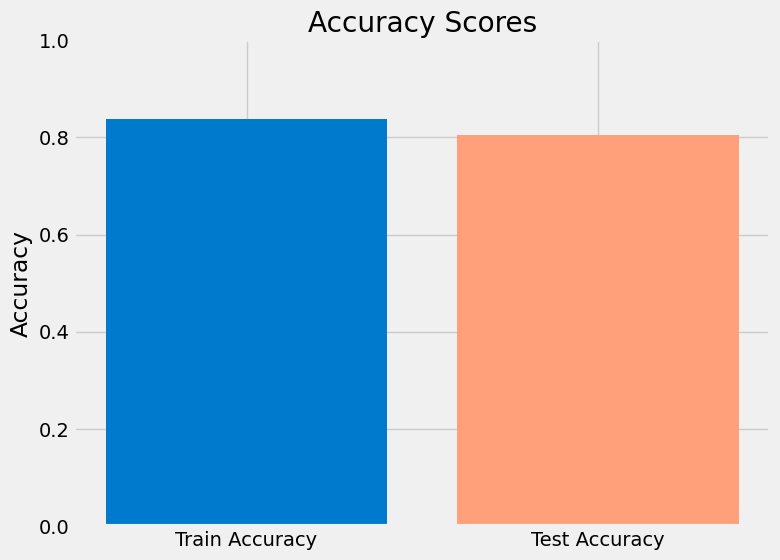

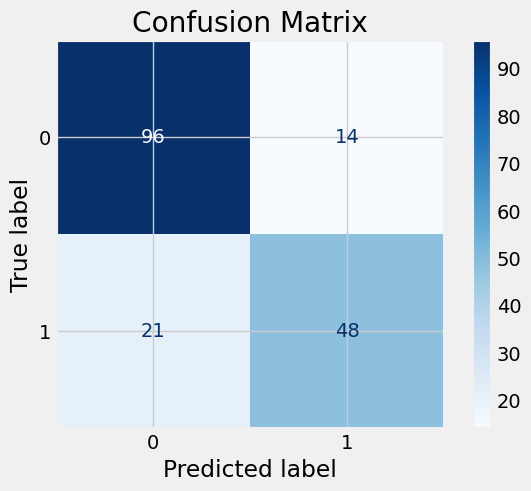

In [71]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

# Make predictions
y_train_pred = classifier.predict(X_train)
y_test_pred = classifier.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print('Train Accuracy:', train_accuracy)
print('Test Accuracy:', test_accuracy)

# Plot accuracy score
plt.figure(figsize=(8, 6))
plt.bar(['Train Accuracy', 'Test Accuracy'], [train_accuracy, test_accuracy], color=['#007acc', '#ffa07a'])
plt.ylim(0, 1)
plt.title('Accuracy Scores')
plt.ylabel('Accuracy')
plt.show()
print('\n\n')
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


In [74]:
classifier

KNeighborsClassifier()

In [75]:
scaler

StandardScaler()

In [76]:
import joblib
joblib.dump(classifier, 'knn_model.joblib')
joblib.dump(scaler, 'scaler.joblib')

['scaler.joblib']

#Prediction

In [55]:
d = {'Pclass': 3,
 'gender': 0,
 'Age': 22.0,
 'SibSp': 1,
 'Parch': 0,
 'Fare': 7.25,
 'Embarked': 0}

In [57]:
sample_data = pd.DataFrame([d])
sample_data

,Pclass,gender,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.25,0


In [59]:
scaled_data = scaler.transform(sample_data)
scaled_data

array([[ 0.81958314, -0.72882288, -0.57173552,  0.43002912, -0.47534602,
        -0.52677057, -0.56746778]])

In [60]:
classifier.predict(scaled_data)

array([0])

In [61]:
classifier.predict_proba(scaled_data)

array([[0.8, 0.2]])

In [62]:
def predict_survival(d):
    sample_data = pd.DataFrame([d])
    scaled_data = scaler.transform(sample_data)
    pred = classifier.predict(scaled_data)[0]
    prob = classifier.predict_proba(scaled_data)[0][pred]
    return pred,prob

In [67]:
d = {'Pclass': 3,
 'gender': 0,
 'Age': 50.0,
 'SibSp': 1,
 'Parch': 0,
 'Fare': 7.25,
 'Embarked': 0}

pred,prob = predict_survival(d)
pred,prob

(1, 0.6)

In [81]:
%%writefile requirements.txt
streamlit
pandas==2.2.2
joblib==1.4.2
scikit-learn==1.6.0

Writing requirements.txt


In [82]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib

# Load the pre-trained classifier and scaler using joblib
classifier = joblib.load('knn_model.joblib')
scaler = joblib.load('scaler.joblib')

# Define the prediction function
def predict_survival(d):
    sample_data = pd.DataFrame([d])
    scaled_data = scaler.transform(sample_data)
    pred = classifier.predict(scaled_data)[0]
    prob = classifier.predict_proba(scaled_data)[0][pred]
    return pred, prob

# Streamlit UI components
st.title("Titanic Survival Prediction")

# Input fields for each parameter
pclass = st.selectbox("Pclass", [1, 2, 3], index=2)
gender = st.selectbox("Gender", ["male", "female"], index=0)
age = st.number_input("Age", min_value=0.0, max_value=100.0, value=50.0, step=0.1)
sibsp = st.number_input("SibSp", min_value=0, max_value=10, value=1)
parch = st.number_input("Parch", min_value=0, max_value=10, value=0)
fare = st.number_input("Fare", min_value=0.0, max_value=500.0, value=7.25, step=0.1)
embarked = st.selectbox("Embarked", ["S", "C", "Q"], index=0)

# Map the gender and embarked values to numeric
gender_map = {'male': 0, 'female': 1}
embarked_map = {'S': 0, 'C': 1, 'Q': 2}

# Create the input dictionary for prediction
input_data = {
    'Pclass': pclass,
    'gender': gender_map[gender],
    'Age': age,
    'SibSp': sibsp,
    'Parch': parch,
    'Fare': fare,
    'Embarked': embarked_map[embarked]
}

# When the user clicks the "Predict" button
if st.button("Predict"):
    with st.spinner('Making prediction...'):
        pred, prob = predict_survival(input_data)

        if pred == 1:
            # Survived
            st.success(f"Prediction: Survived with probability {prob:.2f}")
        else:
            # Not survived
            st.error(f"Prediction: Did not survive with probability {prob:.2f}")

Writing app.py


In [83]:
!python -V

Python 3.10.12
